In [41]:
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from collections import Counter

from bokeh.plotting import figure, ColumnDataSource, output_file, show
from bokeh.io import output_notebook, show
from bokeh.models import HoverTool
from sklearn.preprocessing import StandardScaler
from MulticoreTSNE import MulticoreTSNE as TSNE
import json
import os
output_notebook()

Loading BokehJS ...

In [3]:
import glob

In [4]:
len(list(glob.iglob('stocks/**/**')))

8717

In [5]:
os.path.basename('stocks/a/aa.json').replace('.json','').upper()

'AA'

In [6]:
def get_symbols_list():
    if os.path.exists('symbols.json'):
        with open('symbols.json',mode='r') as f:
            return json.load(f)
    try:
        data = rq.get('https://api.iextrading.com/1.0/ref-data/symbols').json()
        with open('symbols.json',mode='w') as f:
            json.dump(data, f)
        return data
    except Exception as ex:
        print(ex)
        pass

stock_type = {}
for s in get_symbols_list():
    if s['type'] == 'et' or s['type'] == 'ce':
        continue
    stock_type[s['symbol']] = s['type']

In [7]:
len(stock_type.keys())

7781

In [8]:
'XCBABA' in stock_type

False

In [9]:
def get_list(p = 'stocks'):
    for path in glob.iglob(p+'/**/**'):
        s = os.path.basename(path).replace('.json','').upper()
        with open(path, mode='r') as f:
            data = json.load(f)
            if len(data) == 0 or s not in stock_type:
                continue
            yield (s, data)

In [10]:
def get_path(symbol):
    return os.path.join('stats',symbol[0], symbol+'.json')


In [11]:
def get_stats(symbol):
    try:
        path = get_path(symbol.upper())
        with open(path, mode='r') as f:
            ret = json.load(f)
            return ret["year5ChangePercent"],
        ret["year2ChangePercent"],
        ret["year1ChangePercent"],
        ret["ytdChangePercent"],
        ret["month6ChangePercent"],
        ret["month3ChangePercent"],
        ret["month1ChangePercent"],
        ret["day5ChangePercent"],
        ret["day30ChangePercent"]
    except Exception as ex:
        print(ex)
        return 0,0,0,0,0,0,0,0,0
[get_stats("BABA")]

[(0.7548194695920757,
  0.5150344827586206,
  -0.032189849624060254,
  -0.10285869861148933,
  -0.07909004527416022,
  -0.1253848603885763,
  -0.07536898815870703,
  0.009806325079676357,
  -0.04641740942238691)]

In [12]:
def get_data(symbol):
    dr = os.path.join('stocks',symbol[0])
    if not os.path.exists(dr):
        os.mkdir(dr)
    path = os.path.join(dr, symbol+'.json')
    if os.path.exists(path) and os.stat(path).st_size > 0:
        with open(path, mode='r') as f:
            return (symbol, json.load(f))
    try:
        print(symbol)
        data = rq.get('https://api.iextrading.com/1.0/stock/'+symbol+'/chart/5y').json()
        with open(path,mode='w') as f:
            json.dump(data, f)
        return (symbol,data)
    except Exception as ex:
        print(ex)
        pass

In [98]:
procChange = ["year5ChangePercent", "year2ChangePercent", "year1ChangePercent", "ytdChangePercent", "month6ChangePercent", "month3ChangePercent", "month1ChangePercent", "day5ChangePercent", "day30ChangePercent"]

In [35]:
d.tail(1)['close'][0]

11.83

In [45]:
def get_last_n(d, n_days):
    return d.iloc[:n_days]

In [50]:
get_last_n(logs, 1)

,1,2,3,4,5,6,7,8,9,10,...,39,44,52,56,40,45,60,76,72,58
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
def draw_p(d):
    data = []
    for i, e in enumerate(d):
        
        data.extend([e]*(i+1))
    plt.hist(np.random.poisson(5,1200))


(array([1.416e+03, 0.000e+00, 2.300e+01, 0.000e+00, 0.000e+00, 1.000e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <a list of 20 Patch objects>)

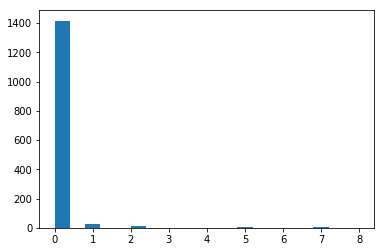

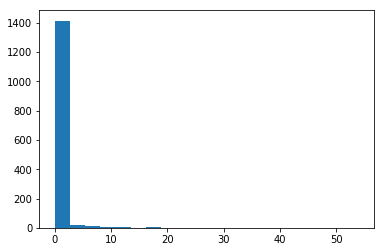

In [112]:
tdata = []
tcols = logs.columns
for row in list(logs.iterrows())[500:]:
    for col in tcols:
        if type(col) == str:
            continue
        tdata.extend([row[1][col]]*(col))
    plt.hist(tdata, bins=20)
    break


In [13]:
def count_logs(dt):
    growl = []
    max_logs = []
    pr = True
    cnt = 0
    for i, v in enumerate(dt):
        if pr == v:
            if v == True:
                cnt = cnt +1
                growl.append(cnt)
        else:
            if (cnt > 0):
                max_logs.append(cnt)
            pr = v
            cnt = 0
            growl.append(0)
    return Counter(max_logs)

In [124]:
def count_logs_fixed(dt):
    ret = count_logs(dt)
    return [ret[i+1] for i in range(5)]

In [118]:
p = list(range(20))
p.extend([10])

In [138]:
poss = []
i = 0
#logs = []
logs = pd.DataFrame(columns=['symbol'].extend(list(range(1, 30))))
for symb, data in get_list():
    #if i > 10 break

    if i % 200 == 0:
        print(i)
    i +=1
#    try:
    d = pd.DataFrame(data)
    d['s'] = symb
    d['grow'] =  (d['high'] - d['open'])/d['open']
    d['0.01'] = d['grow']>=0.01
    #d['0.02'] = d['grow']>=0.02
    #d['0.03'] = d['grow']>=0.03
    #d['0.04'] = d['grow']>=0.04
    #d['0.05'] = d['grow']>=0.05
    d.set_index('date', inplace=True)

    # log = [count_logs(d['0.01'], d['0.02'], d['0.03'], d['0.04'], d['0.05']), 
    l = d
    total = l['grow'].count()
    pos001 = l[l['grow'] >= 0.01]['grow'].count()
    #pos002 = l[l['grow'] >= 0.02]['grow'].count()
    #pos003 = l[l['grow'] >= 0.03]['grow'].count()
    #pos004 = l[l['grow'] >= 0.04]['grow'].count()
    #pos005 = l[l['grow'] >= 0.05]['grow'].count()

    cnt1 = count_logs(d['0.01'])
    logs_dict = dict(cnt1)
    logs_dict['symbol'] = symb
    logs = logs.append(logs_dict, ignore_index=True)

    last_1m = count_logs_fixed(get_last_n(d, 22)['0.01'])
    last_2m = count_logs_fixed(get_last_n(d, 22*2)['0.01'])
    last_3m = count_logs_fixed(get_last_n(d, 22*3)['0.01'])
    last_4m = count_logs_fixed(get_last_n(d, 22*4)['0.01'])
    last_5m = count_logs_fixed(get_last_n(d, 22*5)['0.01'])
    last_6m = count_logs_fixed(get_last_n(d, 22*6)['0.01'])
    last_12m = count_logs_fixed(get_last_n(d, 22*12)['0.01'])

    # for key in sorted(cnt1.keys()):
    #     d['Dist'+str(key)] = cnt1[key]
    # cnt2 = count_logs(d['0.02'])
    # cnt3 = count_logs(d['0.03'])
    # cnt4 = count_logs(d['0.04'])
    # cnt5 = count_logs(d['0.05'])

    # print(cnt2)
    # print(cnt3)
    # print(cnt4)
    # print(cnt5)
    # break

    close = d.tail(1)['close'][0]
    vol = d.tail(1)['volume'][0]
    avgVol = d['volume'].mean()
    add_row = [symb, close, vol, avgVol,total, pos001,pos002,pos003,pos004,pos005,
               pos001/total,pos002/total,pos003/total,pos004/total,pos005/total,
               *get_stats(symb),
                *last_1m,
                *last_2m,
                *last_3m,
                *last_4m,
                *last_5m,
                *last_6m,
                *last_12m
              ]

    poss.append(add_row)
logs = logs.set_index('symbol')
logs.fillna(0, inplace=True)

0
200
400
600
800
1000
1200
1400
'day30ChangePercent'
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600


In [15]:
logs.to_csv('logs.csv')

In [ ]:
logs.set_index('symbol')

In [135]:
print(poss[1])
print(['symbol','close' 'total days', 'over 1%', 'over 2%', 'over 3%','over 4%','over 5%','rate001', 'rate002', 'rate003','rate004','rate005'])

['REI', 9.91, 749981, 277951.5984126984, 1260, 864, 65, 17, 4, 2, 0.6857142857142857, 0.051587301587301584, 0.013492063492063493, 0.0031746031746031746, 0.0015873015873015873, -0.3165045865232085, -0.06155303030303033, -0.30504908835904626, -0.3189003436426117, -0.3045614035087719, -0.24351145038167935, -0.11200716845878136, -0.10640216411181241, -0.1748542880932556, 2, 1, 0, 0, 0, 5, 2, 0, 0, 0, 6, 3, 0, 1, 0, 6, 4, 1, 1, 0, 6, 4, 1, 1, 0, 7, 6, 1, 1, 1, 19, 8, 4, 1, 3]
['symbol', 'closetotal days', 'over 1%', 'over 2%', 'over 3%', 'over 4%', 'over 5%', 'rate001', 'rate002', 'rate003', 'rate004', 'rate005']


In [139]:
bin_names = []
for days_group in [22, 22*2, 22*3, 22*4, 22*5, 22*6, 22*12]:
    for gays_group_bins in range(1, 6):
        bin_names.append(str.format("Bin {0} in Last {1} Days", gays_group_bins, days_group))

In [140]:
pdrate = pd.DataFrame(poss, columns=['symbol','close','volume', 'avg volume', 'total days',
                                     'Amount of days stock high was over 1% (for 5 year period)',
                                     'Amount of days stock high was over 2% (for 5 year period)', 
                                     'Amount of days stock high was over 3% (for 5 year period)',
                                     'Amount of days stock high was over 4% (for 5 year period)',
                                     'Amount of days stock high was over 5`% (for 5 year period)',
                                     'frequency of 1% increase from open to total amount of days traded during 5 year period',
                                     'frequency of 2% increase from open to total amount of days traded during 5 year period',
                                     'frequency of 3% increase from open to total amount of days traded during 5 year period',
                                     'frequency of 4% increase from open to total amount of days traded during 5 year period',
                                     'frequency of 5% increase from open to total amount of days traded during 5 year period',
                                     "5 Years Price Change (in percent)", "2 Years Price Change (in percent)",
                                     "1 Years Price Change (in percent)", "Year To Date CP", 
                                     "month6CP", "month3CP", "month1CP", "day5CP", "day30CP",
                                    *bin_names
                                    ])
pdrate.set_index('symbol', inplace=True)
pdrate.to_csv('research_clean_bins.csv')

In [45]:
pdrate.describe()

,total,001,002,003,004,005,rate001,rate002,rate003,rate004,rate005
count,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000
mean,964.194953,365.883512,187.381841,109.001498,69.377232,46.509160,0.354057,0.189410,0.115132,0.076284,0.052983
std,424.540869,302.663045,209.048010,147.890276,107.919811,80.274597,0.250104,0.191447,0.144425,0.111234,0.087309
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,658.500000,73.000000,12.000000,3.000000,1.000000,0.000000,0.098482,0.014469,0.003968,0.001567,0.000000
50%,1259.000000,325.000000,104.000000,39.000000,16.000000,8.000000,0.364286,0.123810,0.044321,0.018254,0.008730
75%,1260.000000,633.000000,315.000000,159.500000,88.000000,52.000000,0.577778,0.333333,0.190657,0.112854,0.068218
max,1263.000000,1038.000000,837.000000,716.000000,675.000000,645.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
pdrate['close'].mean()

132.7287070722431

for symbol in get_list():
    get_data(symbol['symbol'])

In [87]:
get_data('BABA')

BABA


('BABA',
 [{'date': '2014-09-19',
   'open': 92.7,
   'high': 99.7,
   'low': 89.95,
   'close': 93.89,
   'volume': 271879435,
   'unadjustedVolume': 271879435,
   'change': 93.89,
   'changePercent': 0,
   'vwap': 92.8646,
   'label': 'Sep 19, 14',
   'changeOverTime': 0},
  {'date': '2014-09-22',
   'open': 92.7,
   'high': 92.95,
   'low': 89.5,
   'close': 89.89,
   'volume': 66657827,
   'unadjustedVolume': 66657827,
   'change': -4,
   'changePercent': -4.26,
   'vwap': 90.5679,
   'label': 'Sep 22, 14',
   'changeOverTime': -0.04260304611779742},
  {'date': '2014-09-23',
   'open': 88.94,
   'high': 90.48,
   'low': 86.62,
   'close': 87.17,
   'volume': 39009788,
   'unadjustedVolume': 39009788,
   'change': -2.72,
   'changePercent': -3.026,
   'vwap': 87.7513,
   'label': 'Sep 23, 14',
   'changeOverTime': -0.07157311747789966},
  {'date': '2014-09-24',
   'open': 88.47,
   'high': 90.57,
   'low': 87.22,
   'close': 90.57,
   'volume': 32088108,
   'unadjustedVolume': 32088

In [71]:
symbols = get_list()

In [2]:
symbls = ['FMBL','CRM','VODG','CGC','ATRC','TPL','ABT',
          'ISRG','ICUI','ABMD','SFIX','HEAR','IQ','GMED',
          'NFLX','BLK','LMT','DBX','MU','TTD','BA','TSLA',
          'EBAY','CTSH','NVDA','ALGN','SMRT','IPHI','BABA',
          'AGNC','PRNT','OILD','NK','GOOGL','FB','AMZN','AAPL']

In [3]:
def get_data():
    for s in symbls:
        try:
            print(s)
            data = rq.get('https://api.iextrading.com/1.0/stock/'+s+'/chart/5y').json()
            yield (s,data)
        except Exception as ex:
            print(ex)
            pass

In [4]:
data = list(get_data())

FMBL
Expecting value: line 1 column 1 (char 0)
CRM
VODG
Expecting value: line 1 column 1 (char 0)
CGC
ATRC
TPL
ABT
ISRG
ICUI
ABMD
SFIX
HEAR
IQ
GMED
NFLX
BLK
LMT
DBX
MU
TTD
BA
TSLA
EBAY
CTSH
NVDA
ALGN
SMRT
IPHI
BABA
AGNC
PRNT
OILD
NK
GOOGL
FB
AMZN
AAPL


In [5]:
data[0][1][0]

{'date': '2013-09-30',
 'open': 51.14,
 'high': 52.25,
 'low': 50.76,
 'close': 51.91,
 'volume': 5051473,
 'unadjustedVolume': 5051473,
 'change': -0.52,
 'changePercent': -0.992,
 'vwap': 51.8936,
 'label': 'Sep 30, 13',
 'changeOverTime': 0}

In [6]:
list(data[0][1][0].keys())

['date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'unadjustedVolume',
 'change',
 'changePercent',
 'vwap',
 'label',
 'changeOverTime']

In [7]:
dfs = {}
df = pd.DataFrame(columns=list(data[0][1][0].keys()))
for s, dt in data:
    d = pd.DataFrame(dt)
    d['s'] = s
    d['grow'] =  (d['high'] - d['open'])/d['open']
    d['0.01'] = d['grow']>=0.01
    d['0.02'] = d['grow']>=0.02
    d['0.05'] = d['grow']>=0.05
    d.set_index('date', inplace=True)
    dfs[s] = d

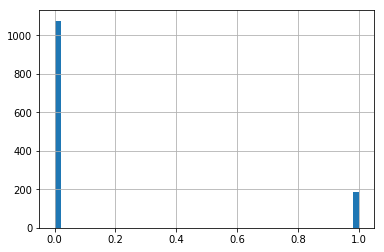

In [8]:
dfs['ICUI']['0.02'].hist(bins=50)

In [9]:
l = dfs['ICUI']

In [26]:
poss = []
for symb in dfs.keys():
    l = dfs[symb]
    pos = l[l['grow'] >= 0.01]['grow'].count()
    neg = l['grow'].count()
    poss.append([symb, pos, neg, pos/neg])

In [30]:
pdrate = pd.DataFrame(poss, columns=['symbol', 'positive', 'total', 'rate'])
pdrate.set_index('symbol', inplace=True)

In [33]:
pdrate.to_csv('research.csv', sep='\t')

In [35]:
l['0.01'] = l['grow']>=0.01

In [11]:
tf = list(l['0.01'])

In [16]:
growl = []
pr = tf[0]
cnt = 0
for i, v in enumerate(tf[1:]):
    if pr == v:
        growl.append(cnt)
        cnt = cnt +1
    else:
        if (cnt > 0):
            max_logs.append(cnt)
        pr = v
        cnt = 0
        growl.append(0)

In [43]:
scatter = figure( plot_width=1000, plot_height=1000,  title="Mouse over the dots", y_range=(0, 5))

In [45]:
scatter.vbar(x=range(len(growl)), top=growl, width=0.7)
show(scatter)

(0, 5)

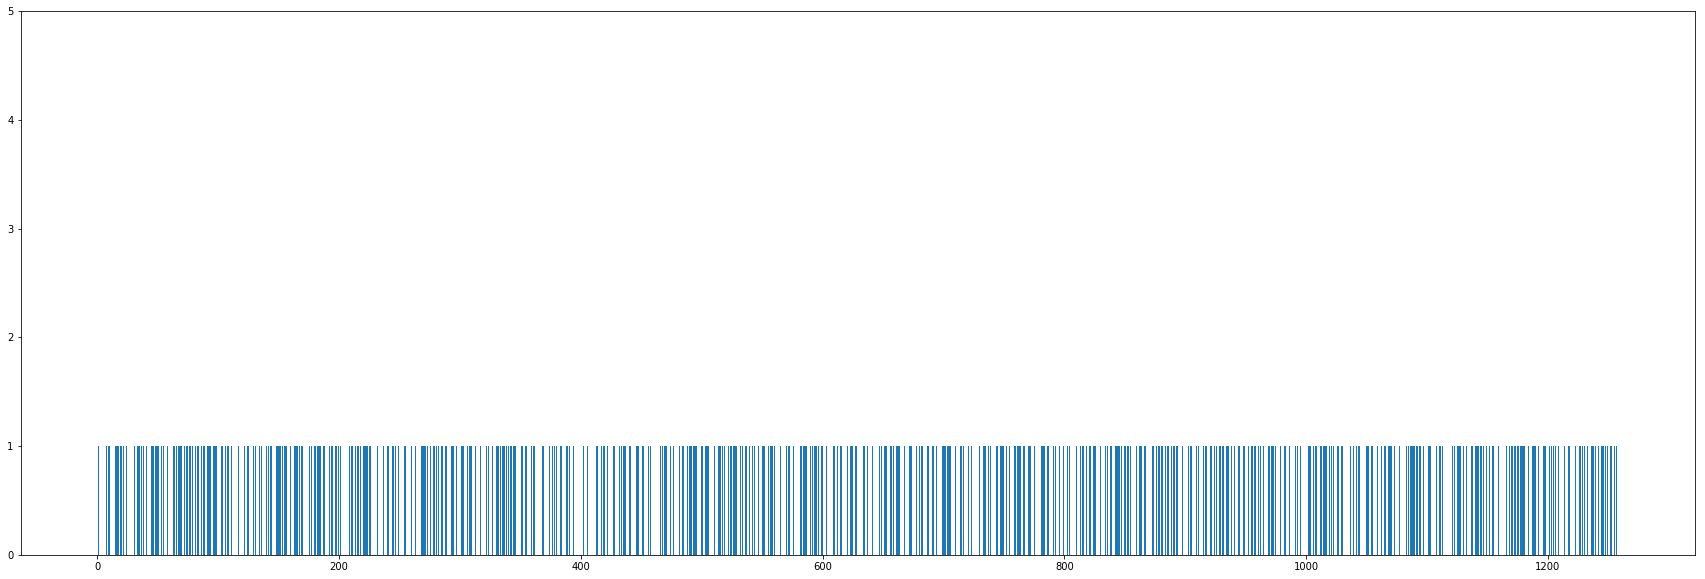

In [34]:
plt.figure(figsize=(30,10))
plt.bar(range(len(growl)), growl)
plt.ylim(0, 5)

In [17]:
l[l['grow']>= 0.01]['grow'].count()

607

In [21]:
l['grow'].count()

1260

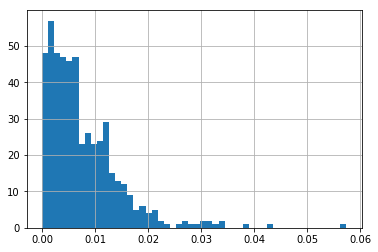

In [42]:
df['grow'].hist(bins=50)

In [62]:
pdrate[['rate001', 'rate002', 'rate003','rate004','rate005']]

,rate001,rate002,rate003,rate004,rate005
symbol,,,,,
REDU,0.670886,0.481013,0.354430,0.232068,0.126582
RWX,0.038889,0.003175,0.000794,0.000000,0.000000
REI,0.685714,0.462698,0.290476,0.181746,0.119841
RKDA,0.705053,0.601645,0.497062,0.388954,0.310223
RWGE=,0.024194,0.008065,0.008065,0.000000,0.000000
RSXJ,0.265127,0.085987,0.028662,0.007166,0.003981
RICK,0.549206,0.255556,0.102381,0.051587,0.023016
RFV,0.147619,0.019841,0.005556,0.000794,0.000000
RCON,0.686508,0.572222,0.458730,0.374603,0.296825


In [25]:
tsne_cols = [col for col in list(logs.columns) if col != 'symbol']

In [27]:
logs = logs.fillna(0)

In [37]:
#a = np.array(pdrate[['over 1%', 'over 2%', 'over 3%','over 4%','over 5%','rate001', 'rate002', 'rate003','rate004','rate005',"year5CP", "year2CP", "year1CP", "ytdCP", "month6CP", "month3CP", "month1CP", "day5CP", "day30CP"]])
a = np.array(logs[tsne_cols])
print(a.shape)
scalar = StandardScaler()
scalar.fit(a)
%time scalar.transform(a)

(7741, 52)
CPU times: user 1.55 ms, sys: 3 µs, total: 1.56 ms
Wall time: 1.56 ms


array([[-1.33751236, -1.18694244, -1.04829856, ..., -0.01136657,
        -0.01136657, -0.01136657],
       [-1.11590969, -0.66640954, -0.33003146, ..., -0.01136657,
        -0.01136657, -0.01136657],
       [ 1.10011705,  1.22052223,  1.31172193, ..., -0.01136657,
        -0.01136657, -0.01136657],
       ...,
       [ 0.58304414, -0.08081003, -0.84307939, ..., -0.01136657,
        -0.01136657, -0.01136657],
       [ 0.61997792,  0.24452304,  0.38823565, ..., -0.01136657,
        -0.01136657, -0.01136657],
       [ 0.28757391,  0.0493232 , -0.43264104, ..., -0.01136657,
        -0.01136657, -0.01136657]])

In [38]:
# pdrate[['over 1%', 'over 2%', 'over 3%','over 4%','over 5%','rate001', 'rate002', 'rate003','rate004','rate005',"year5CP", "year2CP", "year1CP", "ytdCP", "month6CP", "month3CP", "month1CP", "day5CP", "day30CP"]]
tsne = TSNE(perplexity=200, n_jobs=16,verbose=10)
%time y = tsne.fit_transform(a)

CPU times: user 1min 41s, sys: 1.63 s, total: 1min 43s
Wall time: 1min 43s


In [39]:
y

array([[  5.81893026, -24.0541951 ],
       [ -8.00023722,  -5.97920701],
       [  1.19065645,  16.84596872],
       ...,
       [ 11.53838829,   1.43982437],
       [ -1.53159229,   9.37175939],
       [  8.68762343,  -0.41587388]])

In [40]:
TOOLTIPS = """
<div style="position: relative;">
<img
                src="https://finviz.com/chart.ashx?t=@symbol&s=m&ty=c&ta=1"
                style="float: left; margin: 0px 15px 15px 0px; max-width:200px"
                border="2"
            ></img>
  </div>
  
"""

scatter = figure( plot_width=1000, plot_height=800,  title="Mouse over the dots")#, tools=['hover', 'zoom'])
hover = HoverTool()
hover.tooltips = TOOLTIPS
scatter.tools.append(hover)

#scatter.tooltip
source = ColumnDataSource(data=dict(    x=y[:,0],    y=y[:,1],  symbol=logs['symbol'], idx=list(range(0,len(y)))))
scatter.circle('x', 'y', size=7, source = source)#=X_embedded[:,0], y=X_embedded[:,1])#, sources=list(range(0,2862)))
show(scatter)

In [146]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageDraw


In [159]:
img = Image.open('charts/B/BABA.png')
img.resize((92,46), resample=Image.ANTIALIAS).convert('L').getdata()/255

TypeError: unsupported operand type(s) for /: 'ImagingCore' and 'int'

In [ ]:
d = []
for dr in glob.iglob('crop/img/**'):
    for filename in glob.iglob(dr+"/**"):
        statinfo = os.stat(filename)
        if statinfo.st_size > 0:
            d.append(filename)